# Importing Libraries

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx 
import matplotlib.pyplot as plt
import folium

# Importing Data

In [2]:
gdf = gpd.read_file('data/acs2019_5yr_B25032_14000US06037702501.geojson')

# Exploring Dataset

In [3]:
gdf.shape

(9, 49)

In [4]:
gdf.head(5)

,geoid,name,B25032001,"B25032001, Error",B25032002,"B25032002, Error",B25032003,"B25032003, Error",B25032004,"B25032004, Error",...,"B25032019, Error",B25032020,"B25032020, Error",B25032021,"B25032021, Error",B25032022,"B25032022, Error",B25032023,"B25032023, Error",geometry
0,14000US06037702400,"Census Tract 7024, Los Angeles, CA",1965.0,99.0,554.0,98.0,364.0,90.0,28.0,23.0,...,90.0,97.0,47.0,98.0,62.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.39748 34.02341, -118.3970..."
1,14000US06037702501,"Census Tract 7025.01, Los Angeles, CA",1996.0,135.0,1096.0,171.0,866.0,146.0,56.0,42.0,...,59.0,42.0,47.0,91.0,57.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.40522 34.01703, -118.4050..."
2,14000US06037702502,"Census Tract 7025.02, Los Angeles, CA",2016.0,109.0,1255.0,220.0,269.0,125.0,185.0,94.0,...,91.0,163.0,113.0,224.0,133.0,0.0,12.0,85.0,126.0,"MULTIPOLYGON (((-118.39615 34.00715, -118.3958..."
3,14000US06037702600,"Census Tract 7026, Los Angeles, CA",2327.0,74.0,1771.0,160.0,1451.0,170.0,238.0,97.0,...,17.0,28.0,24.0,69.0,75.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-118.40786 33.99212, -118.4077..."
4,14000US06037702700,"Census Tract 7027, Los Angeles, CA",1271.0,67.0,950.0,81.0,836.0,85.0,98.0,46.0,...,39.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.41108 34.00312, -118.4109..."


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
gdf.sample(5)

,geoid,name,B25032001,"B25032001, Error",B25032002,"B25032002, Error",B25032003,"B25032003, Error",B25032004,"B25032004, Error",B25032005,"B25032005, Error",B25032006,"B25032006, Error",B25032007,"B25032007, Error",B25032008,"B25032008, Error",B25032009,"B25032009, Error",B25032010,"B25032010, Error",B25032011,"B25032011, Error",B25032012,"B25032012, Error",B25032013,"B25032013, Error",B25032014,"B25032014, Error",B25032015,"B25032015, Error",B25032016,"B25032016, Error",B25032017,"B25032017, Error",B25032018,"B25032018, Error",B25032019,"B25032019, Error",B25032020,"B25032020, Error",B25032021,"B25032021, Error",B25032022,"B25032022, Error",B25032023,"B25032023, Error",geometry
2,14000US06037702502,"Census Tract 7025.02, Los Angeles, CA",2016.0,109.0,1255.0,220.0,269.0,125.0,185.0,94.0,11.0,19.0,79.0,62.0,120.0,79.0,154.0,80.0,211.0,87.0,226.0,85.0,0.0,12.0,0.0,12.0,761.0,241.0,60.0,65.0,89.0,79.0,0.0,12.0,32.0,45.0,13.0,23.0,95.0,91.0,163.0,113.0,224.0,133.0,0.0,12.0,85.0,126.0,"MULTIPOLYGON (((-118.39615 34.00715, -118.3958..."
5,14000US06037702801,"Census Tract 7028.01, Los Angeles, CA",2048.0,142.0,737.0,152.0,551.0,136.0,128.0,72.0,0.0,12.0,27.0,31.0,31.0,36.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,1311.0,184.0,231.0,121.0,26.0,31.0,111.0,102.0,347.0,129.0,264.0,138.0,140.0,96.0,83.0,74.0,109.0,97.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.41823 34.01211, -118.4179..."
0,14000US06037702400,"Census Tract 7024, Los Angeles, CA",1965.0,99.0,554.0,98.0,364.0,90.0,28.0,23.0,106.0,86.0,18.0,19.0,28.0,21.0,0.0,12.0,10.0,15.0,0.0,12.0,0.0,12.0,0.0,12.0,1411.0,118.0,254.0,92.0,184.0,64.0,190.0,85.0,200.0,86.0,228.0,90.0,160.0,90.0,97.0,47.0,98.0,62.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.39748 34.02341, -118.3970..."
8,14000US06037703001,"Census Tract 7030.01, Los Angeles, CA",3158.0,149.0,1658.0,220.0,47.0,45.0,305.0,97.0,0.0,17.0,0.0,17.0,35.0,40.0,104.0,97.0,496.0,150.0,629.0,157.0,42.0,43.0,0.0,17.0,1500.0,239.0,0.0,17.0,0.0,17.0,0.0,17.0,25.0,38.0,0.0,17.0,205.0,113.0,568.0,167.0,684.0,191.0,18.0,29.0,0.0,17.0,"MULTIPOLYGON (((-118.39849 33.98813, -118.3984..."
3,14000US06037702600,"Census Tract 7026, Los Angeles, CA",2327.0,74.0,1771.0,160.0,1451.0,170.0,238.0,97.0,15.0,26.0,19.0,29.0,13.0,21.0,0.0,17.0,0.0,17.0,22.0,28.0,13.0,21.0,0.0,17.0,556.0,147.0,148.0,74.0,32.0,38.0,0.0,17.0,185.0,97.0,94.0,68.0,0.0,17.0,28.0,24.0,69.0,75.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-118.40786 33.99212, -118.4077..."


In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             9 non-null      object  
 1   name              9 non-null      object  
 2   B25032001         9 non-null      float64 
 3   B25032001, Error  9 non-null      float64 
 4   B25032002         9 non-null      float64 
 5   B25032002, Error  9 non-null      float64 
 6   B25032003         9 non-null      float64 
 7   B25032003, Error  9 non-null      float64 
 8   B25032004         9 non-null      float64 
 9   B25032004, Error  9 non-null      float64 
 10  B25032005         9 non-null      float64 
 11  B25032005, Error  9 non-null      float64 
 12  B25032006         9 non-null      float64 
 13  B25032006, Error  9 non-null      float64 
 14  B25032007         9 non-null      float64 
 15  B25032007, Error  9 non-null      float64 
 16  B25032008         9 no

In [7]:
list(gdf)

['geoid',
 'name',
 'B25032001',
 'B25032001, Error',
 'B25032002',
 'B25032002, Error',
 'B25032003',
 'B25032003, Error',
 'B25032004',
 'B25032004, Error',
 'B25032005',
 'B25032005, Error',
 'B25032006',
 'B25032006, Error',
 'B25032007',
 'B25032007, Error',
 'B25032008',
 'B25032008, Error',
 'B25032009',
 'B25032009, Error',
 'B25032010',
 'B25032010, Error',
 'B25032011',
 'B25032011, Error',
 'B25032012',
 'B25032012, Error',
 'B25032013',
 'B25032013, Error',
 'B25032014',
 'B25032014, Error',
 'B25032015',
 'B25032015, Error',
 'B25032016',
 'B25032016, Error',
 'B25032017',
 'B25032017, Error',
 'B25032018',
 'B25032018, Error',
 'B25032019',
 'B25032019, Error',
 'B25032020',
 'B25032020, Error',
 'B25032021',
 'B25032021, Error',
 'B25032022',
 'B25032022, Error',
 'B25032023',
 'B25032023, Error',
 'geometry']

# Dropping Data

In [8]:
data_with_no_error = ['geoid',
                      'name',
                      'B25032001',
                      'B25032002',
                      'B25032003',
                      'B25032004',
                      'B25032005',
                      'B25032006',
                      'B25032007',
                      'B25032008',
                      'B25032009',
                      'B25032010',
                      'B25032011',
                      'B25032012',
                      'B25032013',
                      'B25032014',
                      'B25032015',
                      'B25032016',
                      'B25032017',
                      'B25032018',
                      'B25032019',
                      'B25032020',
                      'B25032021',
                      'B25032022',
                      'B25032023',
                      'geometry']
                      

In [9]:
gdf_no_error = gdf[data_with_no_error]

In [10]:
gdf_no_error.head(5)

,geoid,name,B25032001,B25032002,B25032003,B25032004,B25032005,B25032006,B25032007,B25032008,B25032009,B25032010,B25032011,B25032012,B25032013,B25032014,B25032015,B25032016,B25032017,B25032018,B25032019,B25032020,B25032021,B25032022,B25032023,geometry
0,14000US06037702400,"Census Tract 7024, Los Angeles, CA",1965.0,554.0,364.0,28.0,106.0,18.0,28.0,0.0,10.0,0.0,0.0,0.0,1411.0,254.0,184.0,190.0,200.0,228.0,160.0,97.0,98.0,0.0,0.0,"MULTIPOLYGON (((-118.39748 34.02341, -118.3970..."
1,14000US06037702501,"Census Tract 7025.01, Los Angeles, CA",1996.0,1096.0,866.0,56.0,24.0,41.0,0.0,0.0,0.0,109.0,0.0,0.0,900.0,148.0,39.0,223.0,57.0,210.0,90.0,42.0,91.0,0.0,0.0,"MULTIPOLYGON (((-118.40522 34.01703, -118.4050..."
2,14000US06037702502,"Census Tract 7025.02, Los Angeles, CA",2016.0,1255.0,269.0,185.0,11.0,79.0,120.0,154.0,211.0,226.0,0.0,0.0,761.0,60.0,89.0,0.0,32.0,13.0,95.0,163.0,224.0,0.0,85.0,"MULTIPOLYGON (((-118.39615 34.00715, -118.3958..."
3,14000US06037702600,"Census Tract 7026, Los Angeles, CA",2327.0,1771.0,1451.0,238.0,15.0,19.0,13.0,0.0,0.0,22.0,13.0,0.0,556.0,148.0,32.0,0.0,185.0,94.0,0.0,28.0,69.0,0.0,0.0,"MULTIPOLYGON (((-118.40786 33.99212, -118.4077..."
4,14000US06037702700,"Census Tract 7027, Los Angeles, CA",1271.0,950.0,836.0,98.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,321.0,112.0,43.0,9.0,75.0,27.0,55.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.41108 34.00312, -118.4109..."


In [11]:
gdf_no_error.columns = ['geoid',
 'name',
 'Total',
 'Owner Occupied Housing Units',
 'Owner, 1, detached',
 'Owner, 1, attached',
 'Owner, 2',
 'Owner, 3 or 4',
 'Owner, 5 to 9',
 'Owner, 10 to 19',
 'Owner, 20 to 49',
 'Owner, 50 or more',
 'Owner, Mobile Home',
 'Owner, Other',
 'Renter Occupied Housing Units',
 'Renter, 1, detached',
 'Renter, 1, attached',
 'Renter, 2',
 'Renter, 3 or 4',
 'Renter, 5 to 9',
 'Renter, 10 to 19',
 'Renter, 20 to 49',
 'Renter, 50 or more',
 'Renter, Mobile Home',
 'Renter, Other',
 'geometry']


In [12]:
gdf_no_error.head(9)

,geoid,name,Total,Owner Occupied Housing Units,"Owner, 1, detached","Owner, 1, attached","Owner, 2","Owner, 3 or 4","Owner, 5 to 9","Owner, 10 to 19","Owner, 20 to 49","Owner, 50 or more","Owner, Mobile Home","Owner, Other",Renter Occupied Housing Units,"Renter, 1, detached","Renter, 1, attached","Renter, 2","Renter, 3 or 4","Renter, 5 to 9","Renter, 10 to 19","Renter, 20 to 49","Renter, 50 or more","Renter, Mobile Home","Renter, Other",geometry
0,14000US06037702400,"Census Tract 7024, Los Angeles, CA",1965.0,554.0,364.0,28.0,106.0,18.0,28.0,0.0,10.0,0.0,0.0,0.0,1411.0,254.0,184.0,190.0,200.0,228.0,160.0,97.0,98.0,0.0,0.0,"MULTIPOLYGON (((-118.39748 34.02341, -118.3970..."
1,14000US06037702501,"Census Tract 7025.01, Los Angeles, CA",1996.0,1096.0,866.0,56.0,24.0,41.0,0.0,0.0,0.0,109.0,0.0,0.0,900.0,148.0,39.0,223.0,57.0,210.0,90.0,42.0,91.0,0.0,0.0,"MULTIPOLYGON (((-118.40522 34.01703, -118.4050..."
2,14000US06037702502,"Census Tract 7025.02, Los Angeles, CA",2016.0,1255.0,269.0,185.0,11.0,79.0,120.0,154.0,211.0,226.0,0.0,0.0,761.0,60.0,89.0,0.0,32.0,13.0,95.0,163.0,224.0,0.0,85.0,"MULTIPOLYGON (((-118.39615 34.00715, -118.3958..."
3,14000US06037702600,"Census Tract 7026, Los Angeles, CA",2327.0,1771.0,1451.0,238.0,15.0,19.0,13.0,0.0,0.0,22.0,13.0,0.0,556.0,148.0,32.0,0.0,185.0,94.0,0.0,28.0,69.0,0.0,0.0,"MULTIPOLYGON (((-118.40786 33.99212, -118.4077..."
4,14000US06037702700,"Census Tract 7027, Los Angeles, CA",1271.0,950.0,836.0,98.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,321.0,112.0,43.0,9.0,75.0,27.0,55.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.41108 34.00312, -118.4109..."
5,14000US06037702801,"Census Tract 7028.01, Los Angeles, CA",2048.0,737.0,551.0,128.0,0.0,27.0,31.0,0.0,0.0,0.0,0.0,0.0,1311.0,231.0,26.0,111.0,347.0,264.0,140.0,83.0,109.0,0.0,0.0,"MULTIPOLYGON (((-118.41823 34.01211, -118.4179..."
6,14000US06037702802,"Census Tract 7028.02, Los Angeles, CA",887.0,460.0,438.0,9.0,4.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,427.0,65.0,43.0,32.0,200.0,59.0,10.0,18.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.42133 34.01037, -118.4205..."
7,14000US06037702803,"Census Tract 7028.03, Los Angeles, CA",1222.0,356.0,315.0,26.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,866.0,126.0,51.0,22.0,138.0,287.0,99.0,79.0,19.0,45.0,0.0,"MULTIPOLYGON (((-118.44847 33.99336, -118.4475..."
8,14000US06037703001,"Census Tract 7030.01, Los Angeles, CA",3158.0,1658.0,47.0,305.0,0.0,0.0,35.0,104.0,496.0,629.0,42.0,0.0,1500.0,0.0,0.0,0.0,25.0,0.0,205.0,568.0,684.0,18.0,0.0,"MULTIPOLYGON (((-118.39849 33.98813, -118.3984..."


In [13]:
random_tract = gdf_no_error.sample()
random_tract

,geoid,name,Total,Owner Occupied Housing Units,"Owner, 1, detached","Owner, 1, attached","Owner, 2","Owner, 3 or 4","Owner, 5 to 9","Owner, 10 to 19","Owner, 20 to 49","Owner, 50 or more","Owner, Mobile Home","Owner, Other",Renter Occupied Housing Units,"Renter, 1, detached","Renter, 1, attached","Renter, 2","Renter, 3 or 4","Renter, 5 to 9","Renter, 10 to 19","Renter, 20 to 49","Renter, 50 or more","Renter, Mobile Home","Renter, Other",geometry
3,14000US06037702600,"Census Tract 7026, Los Angeles, CA",2327.0,1771.0,1451.0,238.0,15.0,19.0,13.0,0.0,0.0,22.0,13.0,0.0,556.0,148.0,32.0,0.0,185.0,94.0,0.0,28.0,69.0,0.0,0.0,"MULTIPOLYGON (((-118.40786 33.99212, -118.4077..."


In [14]:
random_tract.iloc[0]['Total']

2327.0

In [15]:
print(random_tract.iloc[0]['Owner Occupied Housing Units'] + 
      random_tract.iloc[0]['Renter Occupied Housing Units'])

2327.0


In [16]:
gdf_no_error['Total'].describe()

count       9.000000
mean     1876.666667
std       679.180388
min       887.000000
25%      1271.000000
50%      1996.000000
75%      2048.000000
max      3158.000000
Name: Total, dtype: float64

In [17]:
gdf_no_error.insert(0, "Total homes", sum([gdf_no_error[column] for column in ["Total"]]))
gdf_no_error.insert(1, "Owner occupied homes", sum([gdf_no_error[column] for column in ["Owner Occupied Housing Units"]]))
gdf_no_error.insert(2, "Owner occupied single family homes", sum([gdf_no_error[column] for column in ["Owner, 1, detached", "Owner, 1, attached"]]))
gdf_no_error.insert(3, "Owner occupied smallplex homes", sum([gdf_no_error[column] for column in ["Owner, 2", "Owner, 3 or 4", "Owner, 5 to 9", "Owner, 10 to 19"]]))
gdf_no_error.insert(4, "Owner occupied apartment homes", sum([gdf_no_error[column] for column in ["Owner, 20 to 49", "Owner, 50 or more"]]))
gdf_no_error.insert(5, "Owner occupied other homes", sum([gdf_no_error[column] for column in ["Owner, Mobile Home", "Owner, Other"]]))
gdf_no_error.insert(6, "Renter occupied homes", sum([gdf_no_error[column] for column in ["Renter Occupied Housing Units"]]))
gdf_no_error.insert(7, "Renter occupied single family homes", sum([gdf_no_error[column] for column in ["Renter, 1, detached", "Renter, 1, attached"]]))
gdf_no_error.insert(8, "Renter occupied smallplex homes", sum([gdf_no_error[column] for column in ["Renter, 2", "Renter, 3 or 4", "Renter, 5 to 9", "Renter, 10 to 19"]]))
gdf_no_error.insert(9, "Renter occupied apartment homes", sum([gdf_no_error[column] for column in ["Renter, 20 to 49", "Renter, 50 or more"]]))
gdf_no_error.insert(10, "Renter occupied other homes", sum([gdf_no_error[column] for column in ["Renter, Mobile Home", "Renter, Other"]]))


In [18]:
gdf_no_error

,Total homes,Owner occupied homes,Owner occupied single family homes,Owner occupied smallplex homes,Owner occupied apartment homes,Owner occupied other homes,Renter occupied homes,Renter occupied single family homes,Renter occupied smallplex homes,Renter occupied apartment homes,Renter occupied other homes,geoid,name,Total,Owner Occupied Housing Units,"Owner, 1, detached","Owner, 1, attached","Owner, 2","Owner, 3 or 4","Owner, 5 to 9","Owner, 10 to 19","Owner, 20 to 49","Owner, 50 or more","Owner, Mobile Home","Owner, Other",Renter Occupied Housing Units,"Renter, 1, detached","Renter, 1, attached","Renter, 2","Renter, 3 or 4","Renter, 5 to 9","Renter, 10 to 19","Renter, 20 to 49","Renter, 50 or more","Renter, Mobile Home","Renter, Other",geometry
0,1965.0,554.0,392.0,152.0,10.0,0.0,1411.0,438.0,778.0,195.0,0.0,14000US06037702400,"Census Tract 7024, Los Angeles, CA",1965.0,554.0,364.0,28.0,106.0,18.0,28.0,0.0,10.0,0.0,0.0,0.0,1411.0,254.0,184.0,190.0,200.0,228.0,160.0,97.0,98.0,0.0,0.0,"MULTIPOLYGON (((-118.39748 34.02341, -118.3970..."
1,1996.0,1096.0,922.0,65.0,109.0,0.0,900.0,187.0,580.0,133.0,0.0,14000US06037702501,"Census Tract 7025.01, Los Angeles, CA",1996.0,1096.0,866.0,56.0,24.0,41.0,0.0,0.0,0.0,109.0,0.0,0.0,900.0,148.0,39.0,223.0,57.0,210.0,90.0,42.0,91.0,0.0,0.0,"MULTIPOLYGON (((-118.40522 34.01703, -118.4050..."
2,2016.0,1255.0,454.0,364.0,437.0,0.0,761.0,149.0,140.0,387.0,85.0,14000US06037702502,"Census Tract 7025.02, Los Angeles, CA",2016.0,1255.0,269.0,185.0,11.0,79.0,120.0,154.0,211.0,226.0,0.0,0.0,761.0,60.0,89.0,0.0,32.0,13.0,95.0,163.0,224.0,0.0,85.0,"MULTIPOLYGON (((-118.39615 34.00715, -118.3958..."
3,2327.0,1771.0,1689.0,47.0,22.0,13.0,556.0,180.0,279.0,97.0,0.0,14000US06037702600,"Census Tract 7026, Los Angeles, CA",2327.0,1771.0,1451.0,238.0,15.0,19.0,13.0,0.0,0.0,22.0,13.0,0.0,556.0,148.0,32.0,0.0,185.0,94.0,0.0,28.0,69.0,0.0,0.0,"MULTIPOLYGON (((-118.40786 33.99212, -118.4077..."
4,1271.0,950.0,934.0,16.0,0.0,0.0,321.0,155.0,166.0,0.0,0.0,14000US06037702700,"Census Tract 7027, Los Angeles, CA",1271.0,950.0,836.0,98.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,321.0,112.0,43.0,9.0,75.0,27.0,55.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.41108 34.00312, -118.4109..."
5,2048.0,737.0,679.0,58.0,0.0,0.0,1311.0,257.0,862.0,192.0,0.0,14000US06037702801,"Census Tract 7028.01, Los Angeles, CA",2048.0,737.0,551.0,128.0,0.0,27.0,31.0,0.0,0.0,0.0,0.0,0.0,1311.0,231.0,26.0,111.0,347.0,264.0,140.0,83.0,109.0,0.0,0.0,"MULTIPOLYGON (((-118.41823 34.01211, -118.4179..."
6,887.0,460.0,447.0,13.0,0.0,0.0,427.0,108.0,301.0,18.0,0.0,14000US06037702802,"Census Tract 7028.02, Los Angeles, CA",887.0,460.0,438.0,9.0,4.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,427.0,65.0,43.0,32.0,200.0,59.0,10.0,18.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.42133 34.01037, -118.4205..."
7,1222.0,356.0,341.0,15.0,0.0,0.0,866.0,177.0,546.0,98.0,45.0,14000US06037702803,"Census Tract 7028.03, Los Angeles, CA",1222.0,356.0,315.0,26.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,866.0,126.0,51.0,22.0,138.0,287.0,99.0,79.0,19.0,45.0,0.0,"MULTIPOLYGON (((-118.44847 33.99336, -118.4475..."
8,3158.0,1658.0,352.0,139.0,1125.0,42.0,1500.0,0.0,230.0,1252.0,18.0,14000US06037703001,"Census Tract 7030.01, Los Angeles, CA",3158.0,1658.0,47.0,305.0,0.0,0.0,35.0,104.0,496.0,629.0,42.0,0.0,1500.0,0.0,0.0,0.0,25.0,0.0,205.0,568.0,684.0,18.0,0.0,"MULTIPOLYGON (((-118.39849 33.98813, -118.3984..."


In [19]:
new_dataset = ['geoid',
               'name',
               'Total homes',
               'Owner occupied homes',
               'Owner occupied single family homes',
               'Owner occupied smallplex homes',
               'Owner occupied apartment homes',
               'Owner occupied other homes',
               'Renter occupied homes',
               'Renter occupied single family homes',
               'Renter occupied smallplex homes',
               'Renter occupied apartment homes',
               'Renter occupied other homes',
                      'geometry']

In [20]:
gdf_new = gdf_no_error[new_dataset]
gdf_new

,geoid,name,Total homes,Owner occupied homes,Owner occupied single family homes,Owner occupied smallplex homes,Owner occupied apartment homes,Owner occupied other homes,Renter occupied homes,Renter occupied single family homes,Renter occupied smallplex homes,Renter occupied apartment homes,Renter occupied other homes,geometry
0,14000US06037702400,"Census Tract 7024, Los Angeles, CA",1965.0,554.0,392.0,152.0,10.0,0.0,1411.0,438.0,778.0,195.0,0.0,"MULTIPOLYGON (((-118.39748 34.02341, -118.3970..."
1,14000US06037702501,"Census Tract 7025.01, Los Angeles, CA",1996.0,1096.0,922.0,65.0,109.0,0.0,900.0,187.0,580.0,133.0,0.0,"MULTIPOLYGON (((-118.40522 34.01703, -118.4050..."
2,14000US06037702502,"Census Tract 7025.02, Los Angeles, CA",2016.0,1255.0,454.0,364.0,437.0,0.0,761.0,149.0,140.0,387.0,85.0,"MULTIPOLYGON (((-118.39615 34.00715, -118.3958..."
3,14000US06037702600,"Census Tract 7026, Los Angeles, CA",2327.0,1771.0,1689.0,47.0,22.0,13.0,556.0,180.0,279.0,97.0,0.0,"MULTIPOLYGON (((-118.40786 33.99212, -118.4077..."
4,14000US06037702700,"Census Tract 7027, Los Angeles, CA",1271.0,950.0,934.0,16.0,0.0,0.0,321.0,155.0,166.0,0.0,0.0,"MULTIPOLYGON (((-118.41108 34.00312, -118.4109..."
5,14000US06037702801,"Census Tract 7028.01, Los Angeles, CA",2048.0,737.0,679.0,58.0,0.0,0.0,1311.0,257.0,862.0,192.0,0.0,"MULTIPOLYGON (((-118.41823 34.01211, -118.4179..."
6,14000US06037702802,"Census Tract 7028.02, Los Angeles, CA",887.0,460.0,447.0,13.0,0.0,0.0,427.0,108.0,301.0,18.0,0.0,"MULTIPOLYGON (((-118.42133 34.01037, -118.4205..."
7,14000US06037702803,"Census Tract 7028.03, Los Angeles, CA",1222.0,356.0,341.0,15.0,0.0,0.0,866.0,177.0,546.0,98.0,45.0,"MULTIPOLYGON (((-118.44847 33.99336, -118.4475..."
8,14000US06037703001,"Census Tract 7030.01, Los Angeles, CA",3158.0,1658.0,352.0,139.0,1125.0,42.0,1500.0,0.0,230.0,1252.0,18.0,"MULTIPOLYGON (((-118.39849 33.98813, -118.3984..."


In [33]:
gdf_new['Percent owner occupied homes'] = gdf_new['Owner occupied homes']/gdf_new['Total homes']*100
gdf_new['Percent renter occupied homes'] = gdf_new['Renter occupied homes']/gdf_new['Total homes']*100
gdf_new['Percent of owner occupied single family homes'] = gdf_new['Owner occupied single family homes']/gdf_new['Owner occupied homes']*100
gdf_new['Percent of owner occupied smallplex homes'] = gdf_new['Owner occupied smallplex homes']/gdf_new['Owner occupied homes']*100
gdf_new['Percent of owner occupied apartment homes'] = gdf_new['Owner occupied apartment homes']/gdf_new['Owner occupied homes']*100
gdf_new['Percent of owner occupied other homes'] = gdf_new['Owner occupied other homes']/gdf_new['Owner occupied homes']*100
gdf_new['Percent of renter occupied single family homes'] = gdf_new['Renter occupied single family homes']/gdf_new['Renter occupied homes']*100
gdf_new['Percent of renter occupied smallplex homes'] = gdf_new['Renter occupied smallplex homes']/gdf_new['Renter occupied homes']*100
gdf_new['Percent of renter occupied apartment homes'] = gdf_new['Renter occupied apartment homes']/gdf_new['Renter occupied homes']*100
gdf_new['Percent of renter occupied other homes'] = gdf_new['Renter occupied other homes']/gdf_new['Renter occupied homes']*100

In [22]:
gdf_new['Percent of total single family homes'] = (gdf_new['Owner occupied single family homes'] + gdf_new['Renter occupied single family homes'])/gdf_new['Total homes']*100
gdf_new['Percent of total smallplex homes'] = (gdf_new['Owner occupied smallplex homes'] + gdf_new['Renter occupied smallplex homes'])/gdf_new['Total homes']*100
gdf_new['Percent of total apartment homes'] = (gdf_new['Owner occupied apartment homes'] + gdf_new['Renter occupied apartment homes'])/gdf_new['Total homes']*100
gdf_new['Percent of total other homes'] = (gdf_new['Owner occupied other homes'] + gdf_new['Renter occupied other homes'])/gdf_new['Total homes']*100

In [23]:
gdf_new

,geoid,name,Total homes,Owner occupied homes,Owner occupied single family homes,Owner occupied smallplex homes,Owner occupied apartment homes,Owner occupied other homes,Renter occupied homes,Renter occupied single family homes,Renter occupied smallplex homes,Renter occupied apartment homes,Renter occupied other homes,geometry,Percent owner occupied homes,Percent renter occupied homes,Percent of owner occupied single family homes,Percent of owner occupied smallplex homes,Percent of owner occupied apartment homes,Percent of owner occupied other homes,Percent of renter occupied single family homes,Percent of renter occupied smallplex homes,Percent of renter occupied apartment homes,Percent of renter occupied other homes,Percent of total single family homes,Percent of total smallplex homes,Percent of total apartment homes,Percent of total other homes
0,14000US06037702400,"Census Tract 7024, Los Angeles, CA",1965.0,554.0,392.0,152.0,10.0,0.0,1411.0,438.0,778.0,195.0,0.0,"MULTIPOLYGON (((-118.39748 34.02341, -118.3970...",28.193384,71.806616,70.758123,27.436823,1.805054,0.000000,31.041814,55.138200,13.819986,0.000000,42.239186,47.328244,10.432570,0.000000
1,14000US06037702501,"Census Tract 7025.01, Los Angeles, CA",1996.0,1096.0,922.0,65.0,109.0,0.0,900.0,187.0,580.0,133.0,0.0,"MULTIPOLYGON (((-118.40522 34.01703, -118.4050...",54.909820,45.090180,84.124088,5.930657,9.945255,0.000000,20.777778,64.444444,14.777778,0.000000,55.561122,32.314629,12.124248,0.000000
2,14000US06037702502,"Census Tract 7025.02, Los Angeles, CA",2016.0,1255.0,454.0,364.0,437.0,0.0,761.0,149.0,140.0,387.0,85.0,"MULTIPOLYGON (((-118.39615 34.00715, -118.3958...",62.251984,37.748016,36.175299,29.003984,34.820717,0.000000,19.579501,18.396846,50.854139,11.169514,29.910714,25.000000,40.873016,4.216270
3,14000US06037702600,"Census Tract 7026, Los Angeles, CA",2327.0,1771.0,1689.0,47.0,22.0,13.0,556.0,180.0,279.0,97.0,0.0,"MULTIPOLYGON (((-118.40786 33.99212, -118.4077...",76.106575,23.893425,95.369848,2.653868,1.242236,0.734049,32.374101,50.179856,17.446043,0.000000,80.318006,14.009454,5.113881,0.558659
4,14000US06037702700,"Census Tract 7027, Los Angeles, CA",1271.0,950.0,934.0,16.0,0.0,0.0,321.0,155.0,166.0,0.0,0.0,"MULTIPOLYGON (((-118.41108 34.00312, -118.4109...",74.744296,25.255704,98.315789,1.684211,0.000000,0.000000,48.286604,51.713396,0.000000,0.000000,85.680566,14.319434,0.000000,0.000000
5,14000US06037702801,"Census Tract 7028.01, Los Angeles, CA",2048.0,737.0,679.0,58.0,0.0,0.0,1311.0,257.0,862.0,192.0,0.0,"MULTIPOLYGON (((-118.41823 34.01211, -118.4179...",35.986328,64.013672,92.130258,7.869742,0.000000,0.000000,19.603356,65.751335,14.645309,0.000000,45.703125,44.921875,9.375000,0.000000
6,14000US06037702802,"Census Tract 7028.02, Los Angeles, CA",887.0,460.0,447.0,13.0,0.0,0.0,427.0,108.0,301.0,18.0,0.0,"MULTIPOLYGON (((-118.42133 34.01037, -118.4205...",51.860203,48.139797,97.173913,2.826087,0.000000,0.000000,25.292740,70.491803,4.215457,0.000000,62.570462,35.400225,2.029312,0.000000
7,14000US06037702803,"Census Tract 7028.03, Los Angeles, CA",1222.0,356.0,341.0,15.0,0.0,0.0,866.0,177.0,546.0,98.0,45.0,"MULTIPOLYGON (((-118.44847 33.99336, -118.4475...",29.132570,70.867430,95.786517,4.213483,0.000000,0.000000,20.438799,63.048499,11.316397,5.196305,42.389525,45.908347,8.019640,3.682488
8,14000US06037703001,"Census Tract 7030.01, Los Angeles, CA",3158.0,1658.0,352.0,139.0,1125.0,42.0,1500.0,0.0,230.0,1252.0,18.0,"MULTIPOLYGON (((-118.39849 33.98813, -118.3984...",52.501583,47.498417,21.230398,8.383595,67.852835,2.533172,0.000000,15.333333,83.466667,1.200000,11.146295,11.684611,75.269158,1.899937


<AxesSubplot:>

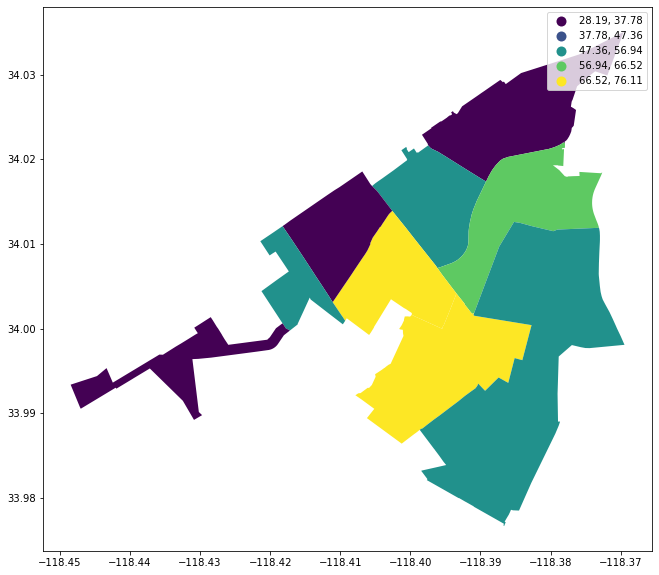

In [24]:
gdf_new.plot(figsize=(15,10),
                 column='Percent owner occupied homes',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot:>

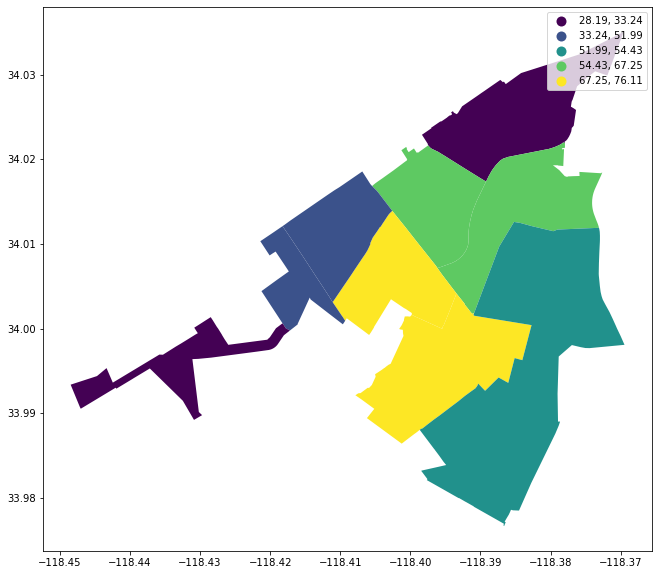

In [25]:
gdf_new.plot(figsize=(15,10),
                 column='Percent owner occupied homes',
                 legend=True, 
                 scheme='quantiles')

<AxesSubplot:>

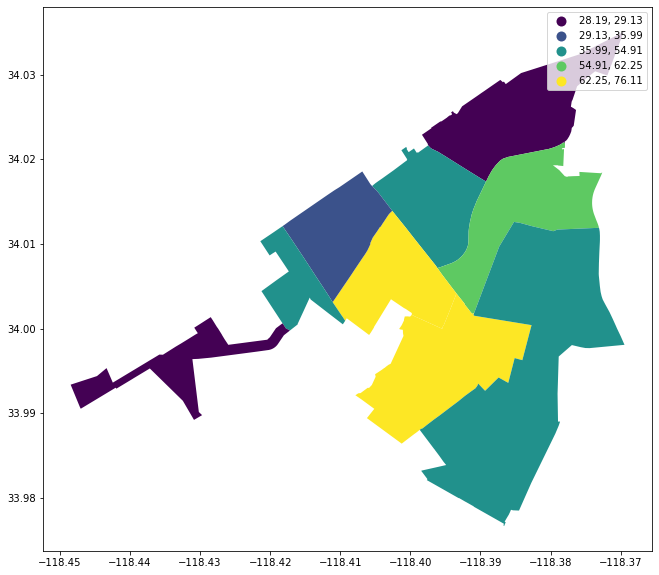

In [26]:
gdf_new.plot(figsize=(15,10),
                 column='Percent owner occupied homes',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

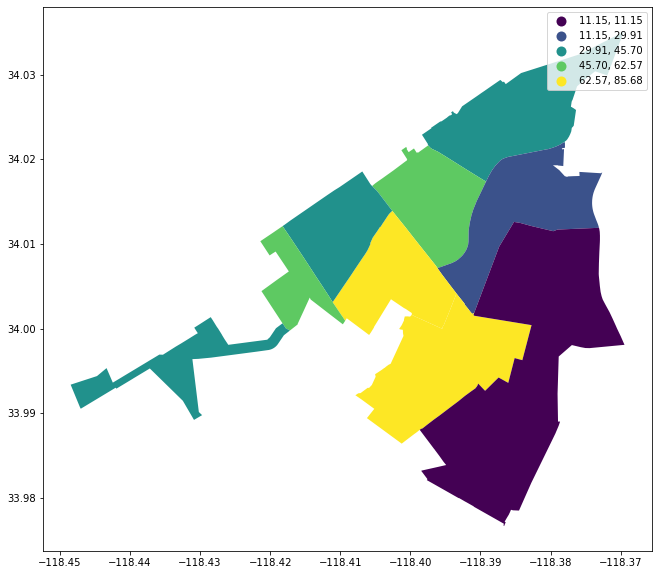

In [27]:
gdf_new.plot(figsize=(15,10),
                 column='Percent of total single family homes',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

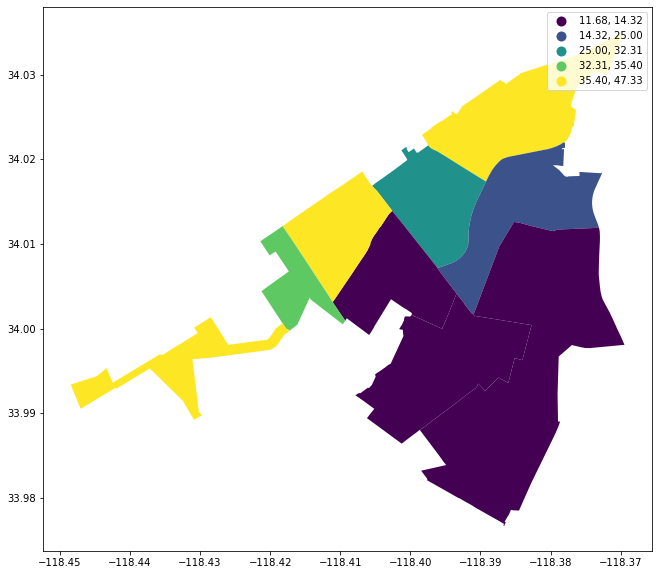

In [28]:
gdf_new.plot(figsize=(15,10),
                 column='Percent of total smallplex homes',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

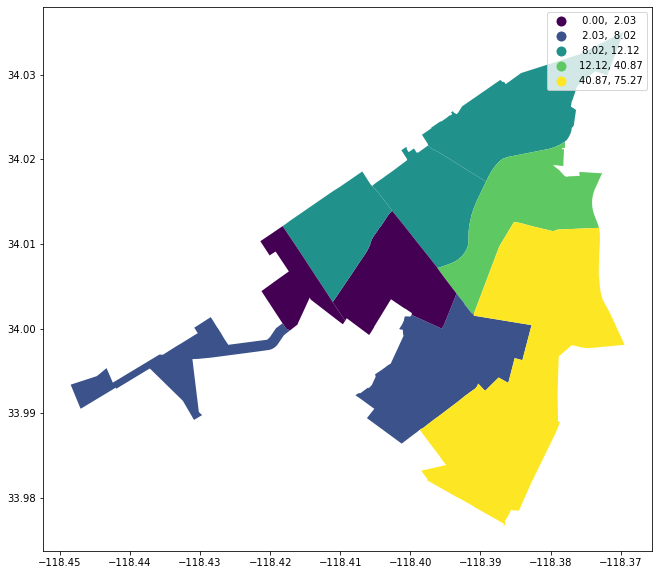

In [29]:
gdf_new.plot(figsize=(15,10),
                 column='Percent of total apartment homes',
                 legend=True, 
                 scheme='NaturalBreaks')

Text(0.5, 1.0, 'Percent of total other homes')

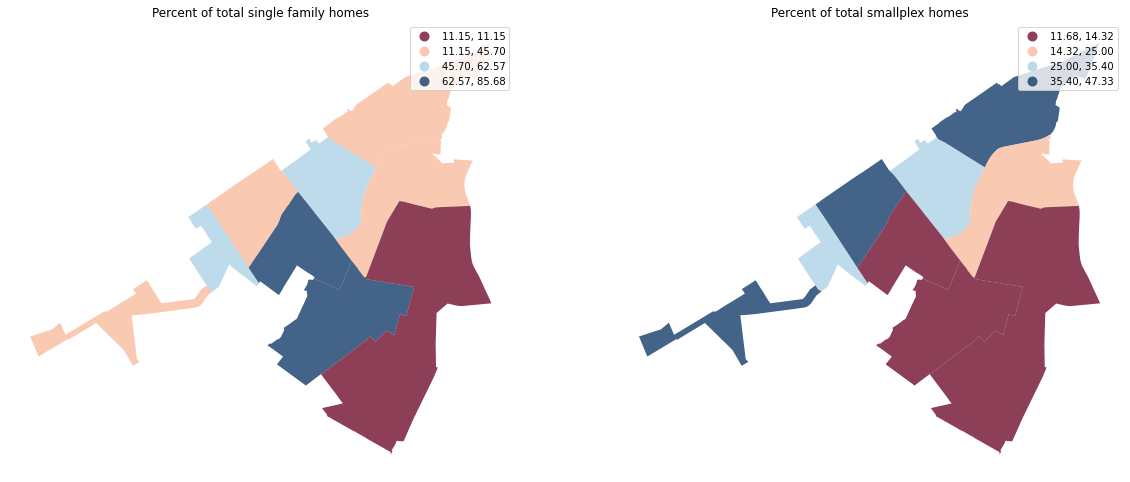

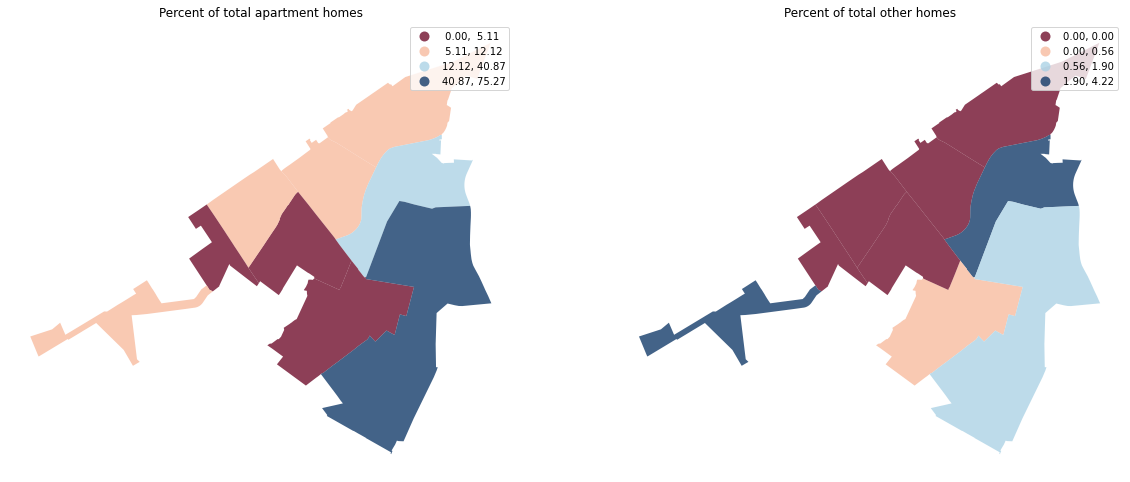

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(20, 18))

ax1, ax2, = axs


gdf_new.plot(column='Percent of total single family homes', 
            cmap='RdBu', 
            scheme='NaturalBreaks',
            k=4, 
            edgecolor='black', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent of total single family homes")

gdf_new.plot(column='Percent of total smallplex homes', 
            cmap='RdBu', 
            scheme='NaturalBreaks',
            k=4, 
            edgecolor='black', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent of total smallplex homes")

fig, axs2 = plt.subplots(1, 2, figsize=(20, 18))

ax3, ax4, = axs2

gdf_new.plot(column='Percent of total apartment homes', 
            cmap='RdBu', 
            scheme='NaturalBreaks',
            k=4, 
            edgecolor='black', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax3,
            legend=True
           )

ax3.axis("off")
ax3.set_title("Percent of total apartment homes")

gdf_new.plot(column='Percent of total other homes', 
            cmap='RdBu', 
            scheme='NaturalBreaks',
            k=4, 
            edgecolor='black', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax4,
            legend=True
           )

ax4.axis("off")
ax4.set_title("Percent of total other homes")


<AxesSubplot:>

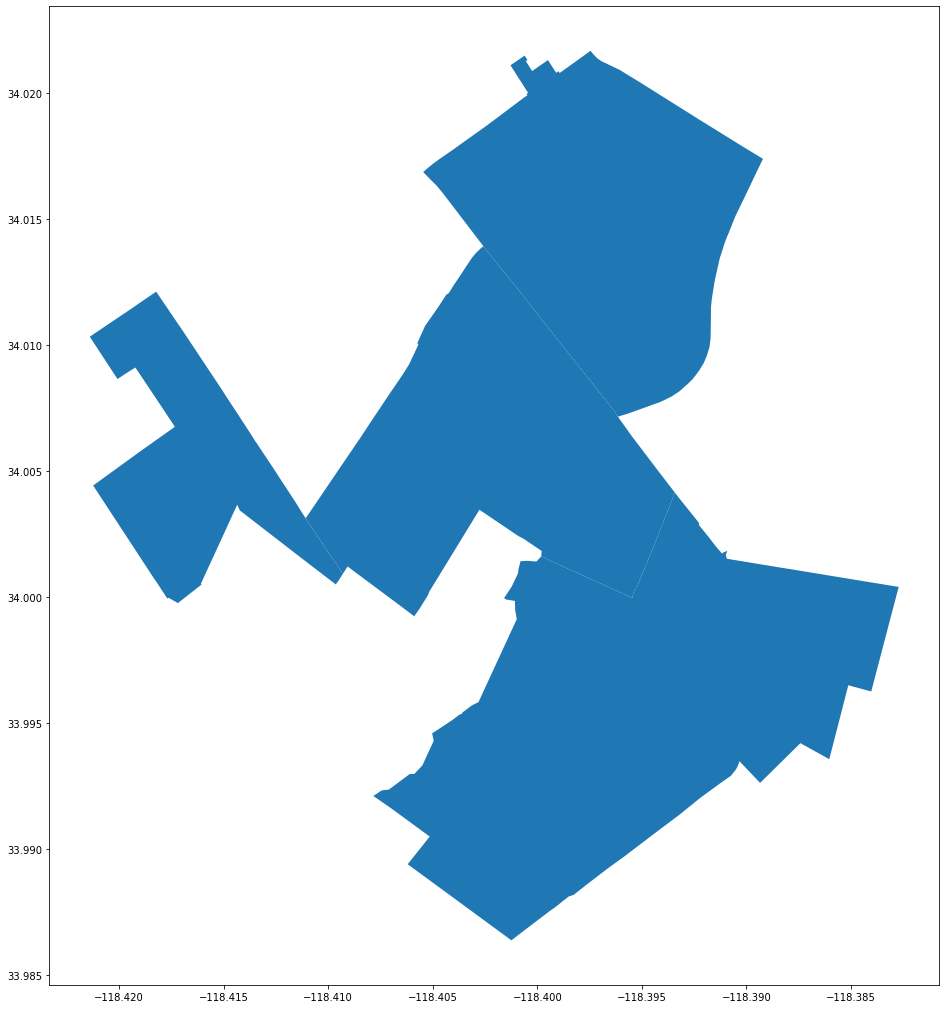

In [42]:
gdf_new[gdf_new['Percent of total single family homes'] > 50].plot(figsize=(20,18))

In [43]:
gdf_web_mercator = gdf_new.to_crs(epsg=3857)